# Iris Species Classification Code
**Library**
In this code, I would like to use four main moduls to identify species classification, consisting of numpy, pandas, scikit, and matplotlib.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [4]:
df = pd.read_csv('Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Plotting Data**

Features that will be indentify are Sepal Length, Sepal Width, Petal Length, and Petal Width. Meanwhile, the target is the species itself.

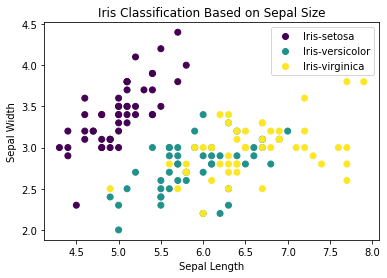

In [39]:
feature_name = list(df['Species'].unique())
dic_color = {feature_name[x]:x for x in range(len(feature_name))}
feature_name
colors = [dic_color[item] for item in df['Species']]

scatter = plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'], c = colors)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Classification Based on Sepal Size')
plt.legend(handles = scatter.legend_elements()[0],labels = dic_color.keys())
plt.savefig('Sepal Size')
plt.show()

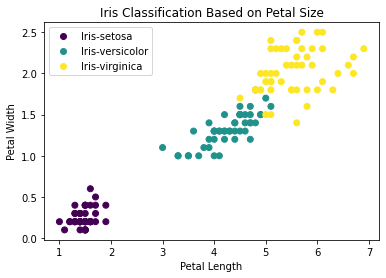

In [11]:
scatter = plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'], c = colors)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Classification Based on Petal Size')
plt.legend(handles = scatter.legend_elements()[0],labels = dic_color.keys())
plt.savefig('Petal Size')
plt.show()

**Choosing between Petal or Sepal**

In [89]:
X = df[['SepalLengthCm', 'SepalWidthCm']]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 6, stratify = y)

knn_sepal = KNeighborsClassifier(n_neighbors = 3)
knn_sepal.fit(X_train,y_train)
sepal_score = knn_sepal.score(X_test,y_test)
sepal_score

0.6444444444444445

In [90]:
X = df[['PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 6, stratify = y)

knn_petal = KNeighborsClassifier(n_neighbors = 3)
knn_petal.fit(X_train,y_train)
petal_score = knn_petal.score(X_test,y_test)

In [36]:
print("Probability Category to choose is", '"Petal Size"' if petal_score > sepal_score else '"Sepal Size"')

Probability Category to choose is "Petal Size"


**Accuraty Evaluation**

Score evaluation actually comes from the percentages how many predicted data that match to true data. Therefore, the images below will illustrate the specific compatible quantity

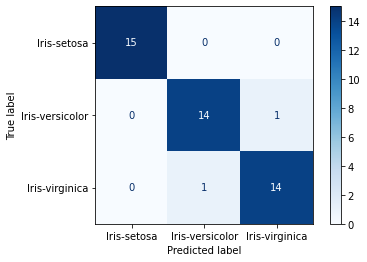

In [45]:
y_pred = knn_petal.predict(X_test)

confusion_matrix(y_test,y_pred,labels = feature_name)
plot_confusion_matrix(knn_petal, X_test, y_test, cmap=plt.cm.Blues)
plt.savefig('Confussion Matrix')
plt.show()

**K - Fold Evaluation**

This evaluation is to randomize different way of splitting. So, the splitting data can be distributed equally and the model would guarantee that the accuracy score is plausible

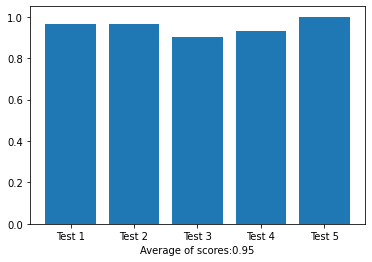

In [69]:
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
xlabel = cv_scores.mean()
test = ['Test '+str(x+1) for x in range(5)]
plt.bar(test,cv_scores)
plt.xlabel("Average of scores:"+str(round(a,2)))
plt.savefig("K - Fold Average")
plt.show()

**Grid Search CV**

Grid Search CV will evaluate that the number of neighbor we used in Knn model give high accuracy. In this case, data range from 2 to 9 number of neighbors.

In [85]:
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(2, 10)}

# use gridsearch to test all values for n_neighbors

knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X, y)
print(knn_gscv.cv_results_['mean_test_score'])
print(np.arange(2, 10))
print(knn_gscv.best_params_)
print(knn_gscv.best_score_)

knn_final = KNeighborsClassifier(n_neighbors = knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X,y)
knn_final.score(X,y)

[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96
 0.96       0.96666667]
[2 3 4 5 6 7 8 9]
{'n_neighbors': 4}
0.9666666666666668


0.9733333333333334

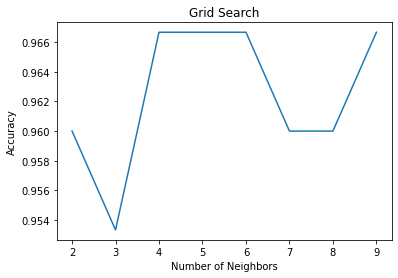

In [88]:
x = np.arange(2, 10)
y = knn_gscv.cv_results_['mean_test_score']
plt.plot(x,y)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Grid Search')
plt.savefig('Grid Search')
plt.show()